#Dataset "Big Mart Sales" - Kaggle

##Este dataset cuenta con datos transaccionales referidos a ventas de distintos productos en distintas tiendas de una cadena de supermercados. 


*  ### El objetivo es construir un modelo capaz de predecir las ventas por producto de una tienda en particular, que forma parte de una cadena de tiendas, y descubrir cuáles son los principales factores que influencian dicha predicción.

*  ### Se cuentan con 2 archivos .csv. Un Dataset de Train y separado otro Dataset para Test (pero que no posee los valores de "Sales").




# Librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
import seaborn as sns

# 1 - Dataset TRAIN. Análisis Exploratorio

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Big Mart Sales/Dataset_Train_BigMart.csv")

In [ ]:
df.shape

(8523, 12)

- 8523 filas con 12 columnas

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- De la info se observan 2 columnas con valores nulos o Nan.

## 1.1 - Análisis de los valores Nan

In [ ]:
print("Hay {} filas que tienen todos sus valores Nan.".format(len(df[df.isnull().all(axis=1)])))

Hay 0 filas que tienen todos sus valores Nan.


- No existen filas con todos sus valores Nan.

In [ ]:
print("Hay {} filas que tienen al menos 1 valor Nan.".format(len(df[df.isnull().any(axis=1)])))

Hay 3873 filas que tienen al menos 1 valor Nan.


In [ ]:
df[df.isnull().any(axis=1)].index

Int64Index([   3,    7,    8,    9,   18,   21,   23,   25,   28,   29,
            ...
            8494, 8496, 8500, 8501, 8502, 8504, 8508, 8509, 8514, 8519],
           dtype='int64', length=3873)

- Índice de las filas que contienen al menos un valor Nan.

### Cantidad de NaN en el Dataset por columnas

Text(0.5, 1.0, 'Cantidad de Nan por cada columna')

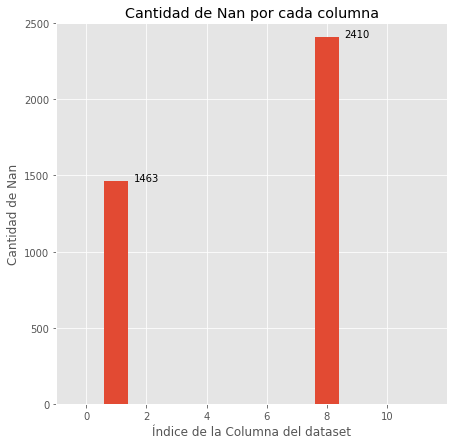

In [ ]:
x00 = []
y00 = []
for j in range(len(df.columns)):
  y_cant = len(df) - (df[df.columns.values[j]].isnull().value_counts()[0])
  x_name = j
  x00.append(x_name)
  y00.append(y_cant)
plt.figure(figsize=(7,7)) 
plt.bar(x00,y00)
def add_value_label(x,y):
    for i in range(1, len(x00)+1):
        if y[i-1] > 10:
          plt.text(i,y[i-1],y[i-1], horizontalalignment='center')
add_value_label(x00,y00)
plt.xlabel("Índice de la Columna del dataset")
plt.ylabel("Cantidad de Nan")
plt.ylim(0, 2500)
plt.title("Cantidad de Nan por cada columna")

#### Nombre de columnas con más de "n" valores Nan.

In [ ]:
n = 10 # limite de corte de cantidad de Nan
labels00 = []
for j in range(len(y00)):
  if y00[j] > n:
    labels00.append(df.columns.values[j])
print(labels00)

['Item_Weight', 'Outlet_Size']


### Cantidad de Nan por filas

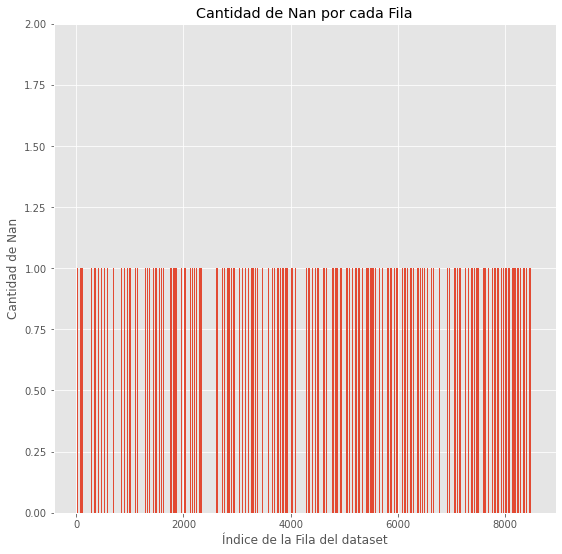

In [ ]:
cant = []
indices = df[df.isnull().any(axis=1)].index
for f in range(len(indices)):
  cant.append(df.iloc[indices[f],:].isnull().value_counts()[1])
  #print("La fila {} tiene {} NaN".format(indices[f], cant[-1]))
plt.figure(figsize=(9,9)) 
plt.bar(indices, cant)
plt.xlabel("Índice de la Fila del dataset")
plt.ylabel("Cantidad de Nan")
plt.ylim(0, 2)
plt.title("Cantidad de Nan por cada Fila")
plt.show()

### Conclusión de los Nan: 

- De los 3873 Nan de todo el dataset de train, 1463 pertecen a la columna "Item_weight" y 2410 a la columna "Outlet_Size". Para todos los casos, siempre hay 1 sólo valor Nan como máximo por cada fila analizada. Es decir que ninguna fila posee más de 1 valor nulo y este es en el peso o en el tamaño de la tienda. Por ahora no se tomará ninguna medida o decisión con respecto a esto, se hará algo o no en función del modelo que se plantee.

## 1.2 - Análisis de variables no numéricas (categóricas)

Variables categóricas:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Location_Type
*   Outlet_Type








### Item_Identifier

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

- No se grafica porque son 1559 datos.

In [ ]:
#df["Item_Identifier"].value_counts().plot.bar()
#plt.title("Cantidad de productos con el mismo Item_Identifier")
#plt.rcParams["figure.figsize"] = [25, 4]

### Item_Fat_Content

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- Hay que reagrupar a la categoría Low Fat y Regular, ya que cuenta con distintas nomenclaturas para indicar lo mismo.

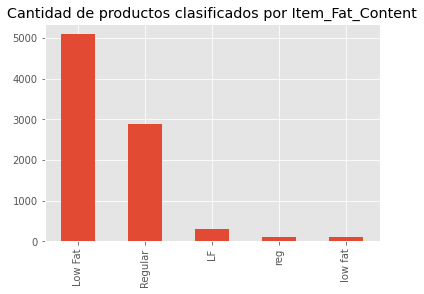

In [ ]:
df["Item_Fat_Content"].value_counts().plot.bar()
plt.title("Cantidad de productos clasificados por Item_Fat_Content")
plt.rcParams["figure.figsize"] = [10, 4]

#### Reagrupación de la categoría Item_Fat_Content con el método .replace()

In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["LF", "low fat", "reg"],["Low Fat", "Low Fat", "Regular"])

- Vemos como quedó luego del reagrupamiento.

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

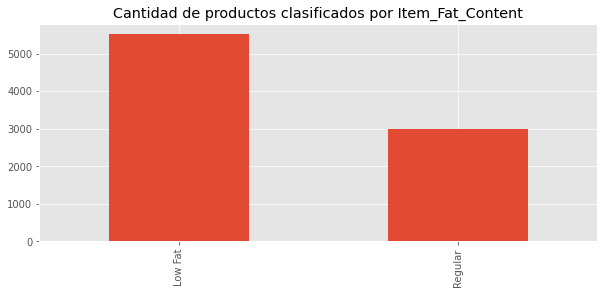

In [ ]:
df["Item_Fat_Content"].value_counts().plot.bar()
plt.title("Cantidad de productos clasificados por Item_Fat_Content")
plt.rcParams["figure.figsize"] = [5, 4]

### Item_type

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

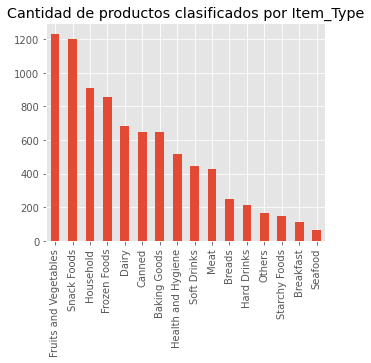

In [ ]:
df["Item_Type"].value_counts().plot.bar()
plt.title("Cantidad de productos clasificados por Item_Type")
plt.rcParams["figure.figsize"] = [20, 4]

### Outlet_Identifier

In [ ]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

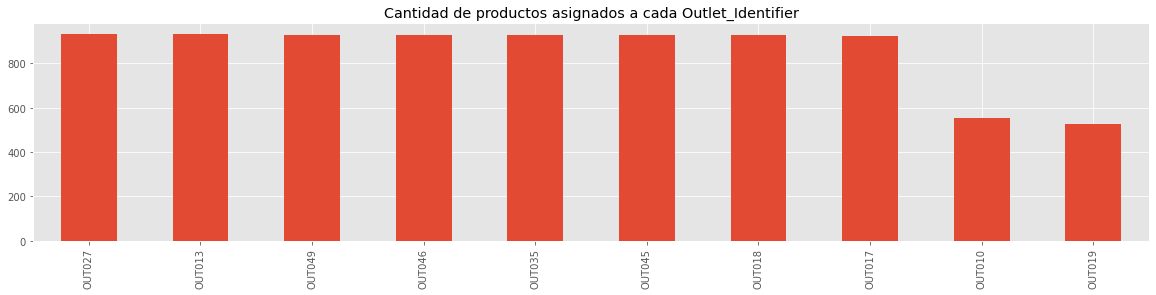

In [ ]:
df["Outlet_Identifier"].value_counts().plot.bar()
plt.title("Cantidad de productos asignados a cada Outlet_Identifier")
plt.rcParams["figure.figsize"] = [8, 4]

### Outlet_Location_Type

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Text(0.5, 1.0, 'Cantidad de productos por Outlet_Location_Type')

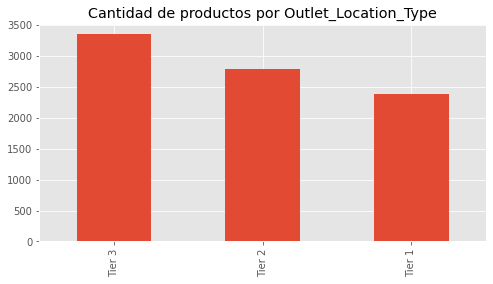

In [ ]:
df["Outlet_Location_Type"].value_counts().plot.bar()
plt.title("Cantidad de productos por Outlet_Location_Type")

### Outlet_Type

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Text(0.5, 1.0, 'Cantidad de productos por Outlet_Type')

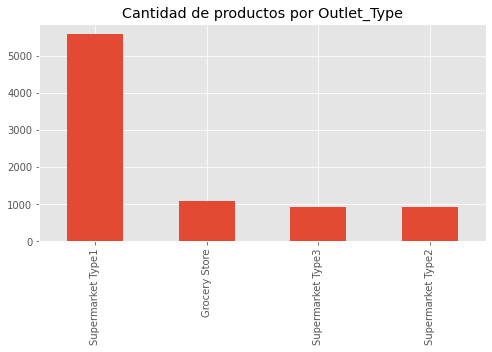

In [ ]:
df["Outlet_Type"].value_counts().plot.bar()
plt.title("Cantidad de productos por Outlet_Type")

## 1.3 - Análisis de las distintas tiendas

- Con este análisis el objetivo es averiguar las características de cada tienda y chequear si hay cruces o no de características; cuáles comparten entre ellas y cuáles no.

In [ ]:
df_tiendas = df[['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']]
df_tiendas

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


- Tabla agrupada por nombre de tienda y su promedio de ventas

In [ ]:
df_tiendas.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year','Outlet_Size', 
                    'Outlet_Location_Type', 'Outlet_Type'], dropna=False)['Item_Outlet_Sales'].mean()

Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type      
OUT010             1998                       NaN          Tier 3                Grocery Store         339.351662
OUT013             1987                       High         Tier 3                Supermarket Type1    2298.995256
OUT017             2007                       NaN          Tier 2                Supermarket Type1    2340.675263
OUT018             2009                       Medium       Tier 3                Supermarket Type2    1995.498739
OUT019             1985                       Small        Tier 1                Grocery Store         340.329723
OUT027             1985                       Medium       Tier 3                Supermarket Type3    3694.038558
OUT035             2004                       Small        Tier 2                Supermarket Type1    2438.841866
OUT045             2002                       NaN          Tier 2                Supermarket Type1    2

- Tabla cruzada entre nombre de tiendas y tipos de alimentos

In [ ]:
pd.crosstab(df['Item_Type'], df['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Baking Goods,42,73,73,68,43,69,68,70,76,66
Breads,17,25,22,27,16,31,29,33,26,25
Breakfast,9,13,12,12,10,11,10,10,10,13
Canned,35,65,69,78,38,72,79,74,72,67
Dairy,43,80,74,73,49,67,71,69,78,78
Frozen Foods,54,92,106,92,49,89,92,81,108,93
Fruits and Vegetables,79,142,127,135,73,140,129,143,126,138
Hard Drinks,16,23,22,22,8,23,22,28,20,30
Health and Hygiene,37,61,61,58,30,60,50,55,56,52


### Conclusiones de las tiendas:
- Son 10 tiendas distintas en total.
- La tienda OUT019 y OUT027 se establecieron en el mismo año (1985), el resto en año distintos.
- Para las tiendas OUT010, OUT017 y OUT045 no se tiene información sobre su tamaño (todos datos Nan).
- Las 10 tiendas se distribuyen en 3 localizaciones distintas.
- Las 10 tiendas se clasifican entre 4 tipos de tiendas diferentes.

## 1.4 - Análisis de las variables numéricas

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Variables numéricas:

*   Item_Weight
*   Item_Visibility
*   Item_MRP
*   Outlet_Establishment_Year
*   Item_Outlet_Sales

#### Item_Weight

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28946a0790>]],
      dtype=object)

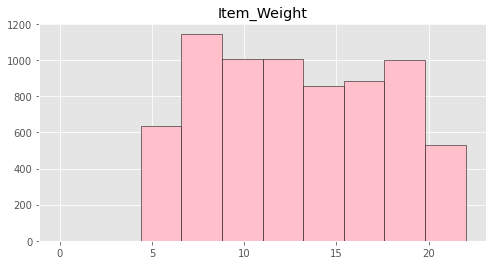

In [ ]:
df.hist('Item_Weight', color= "pink" , edgecolor="k", range=(0, 22))

- El peso de cada producto se distribuye entre 4.55 y 21.35 g.
- Tenemos varios valores faltantes o Nan de peso.

#### Item_Visibility

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2897d68a10>]],
      dtype=object)

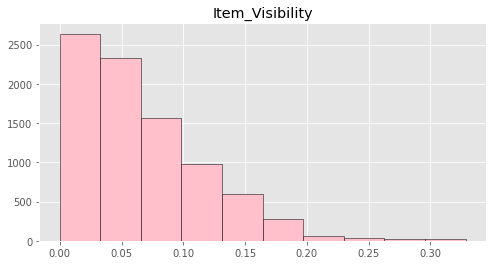

In [ ]:
df.hist('Item_Visibility', color= "pink" , edgecolor="k")

In [ ]:
len(df)/2

4261.5

In [ ]:
len(df[df['Item_Visibility'] < 0.054])

4267

- Es muy notorio como a medida que aumenta el scoring de visibilidad, decrece la cantidad de productos. Más de la mitad de productos poseen un scoring menor a 0.054, siendo el máximo registrado de 0.328391.

#### Item_MRP

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2897e4d9d0>]],
      dtype=object)

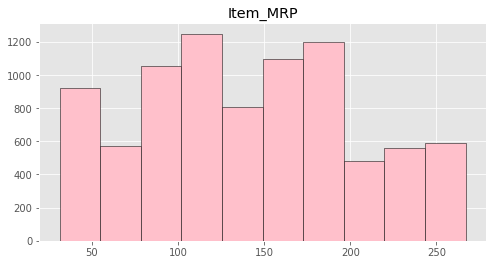

In [ ]:
df.hist('Item_MRP', color= "pink" , edgecolor="k")

- El Item_MRP se distribuye entre 31.29 y 266.89.

### Outlet_Establishment_Year

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f289449de90>]],
      dtype=object)

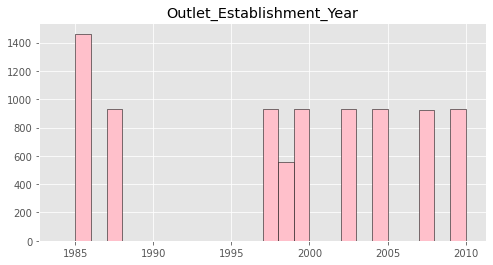

In [ ]:
df.hist('Outlet_Establishment_Year', color= "pink" , edgecolor="k", bins= 26, range=(1984,2010))

### Item_Outlet_Sales

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28947037d0>]],
      dtype=object)

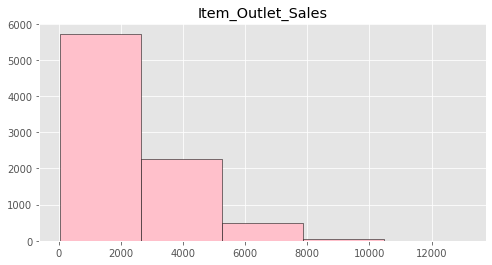

In [ ]:
df.hist('Item_Outlet_Sales', color= "pink" , edgecolor="k", bins= 5)

## 1.5 - Análisis de variables numéricas con las ventas (cruces)

### Matriz de correlación

In [ ]:
corrmat = df.corr()
corrmat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


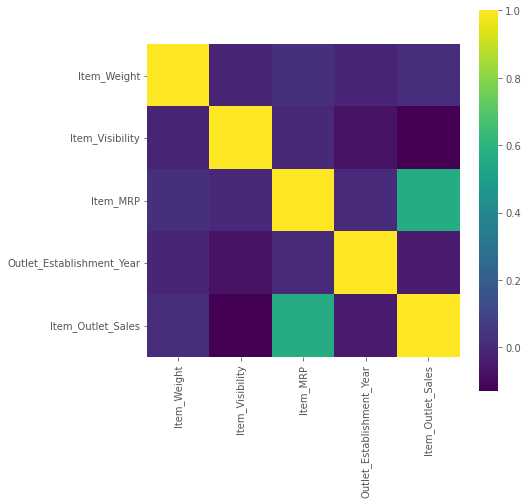

In [ ]:
f, ax = plt.subplots(figsize = (7, 7))
#plt.rcParams.update({'font.size': 8})
sns.heatmap(corrmat, vmax = 1, square = True, cmap = 'viridis')

- Se observa que la variable con mayor correlación con las ventas (Item_Outlet_Sales) es Item_MRP con un valor de 0.567574.
- Por otra parte, la variable Item_Visibility es la segunda que más correlación tiene, aunque en este caso es negativa, con un valor de -0.128.
- Las ortas 2 variables (Item_Weight y Outlet_Establishment_Year) tienen una carrelación cercana a cero con las ventas.

### Gráficas de variables numércias vs ventas (Item_Outlet_Sales)

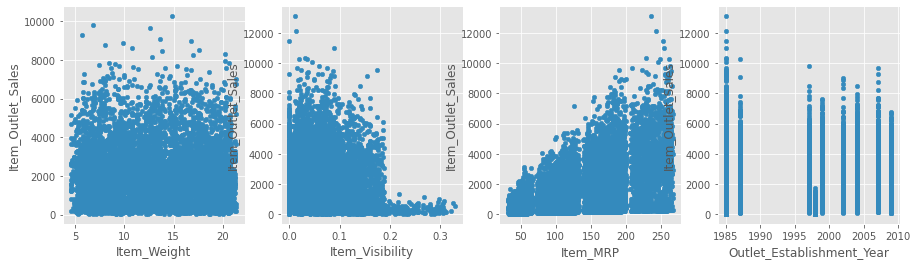

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
df.plot.scatter(x='Item_Weight', y='Item_Outlet_Sales', ax=ax1)
df.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', ax=ax2)
df.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', ax=ax3)
df.plot.scatter(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=ax4)

- Observando las 4 gráficas, cómo el coeficiente de correlación nos anticipó, se concluye que las 2 variables que más pudieran impactar en un modelo predictico de las ventas sin Item_MRP e Item_Visibility (aunque esta última en menor medida)

### Gráfica Item_Visibility vs Item_Outlet_Sales

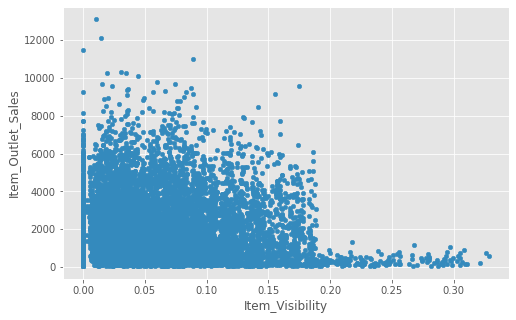

In [ ]:
plt.rcParams["figure.figsize"] = [8, 5]
df.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales')

- Se observa que por encima de un cierto valor de Item_Visibility (aproximadamente 0.19) es muy notorio cómo caen los valores de las ventas por producto.

### Gráfica Item_MRP vs Item_Outlet_Sales

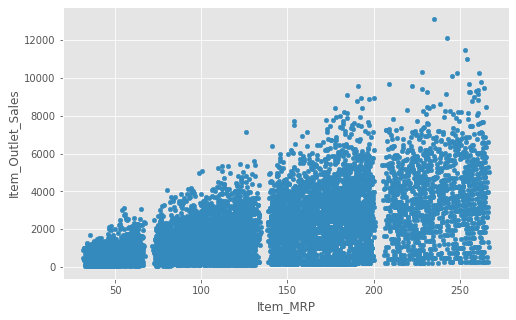

In [ ]:
df.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales')

- En esta gráfica si se observa una tendencia que sugiere que cuando aumenta el Item_MRP aumenta Item_Outlet_Sales. PERO también se observa elevada dispersión en los datos y que la misma aumenta con el incremento de la variable Item_MRP.

### Boxplot de ventas por año de establecimiento de las tiendas

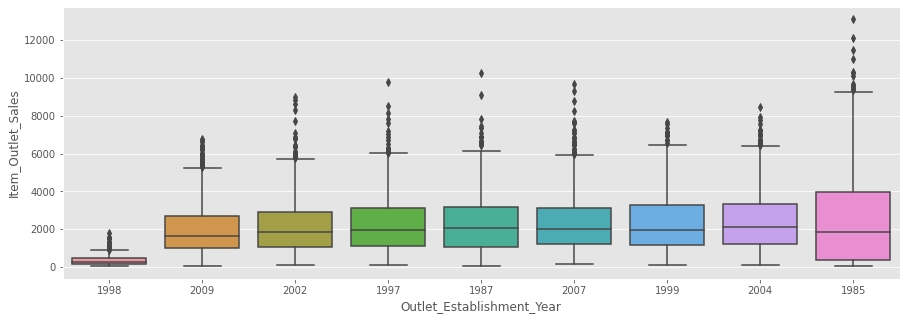

In [ ]:
items_ordenados = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [15, 5]
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, order= items_ordenados) # 9 datos de años, no 10

In [ ]:
pd.crosstab(df_tiendas['Outlet_Identifier'], df_tiendas["Outlet_Establishment_Year"])

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Outlet_Identifier,,,,,,,,,
OUT010,0,0,0,555,0,0,0,0,0
OUT013,0,932,0,0,0,0,0,0,0
OUT017,0,0,0,0,0,0,0,926,0
OUT018,0,0,0,0,0,0,0,0,928
OUT019,528,0,0,0,0,0,0,0,0
OUT027,935,0,0,0,0,0,0,0,0
OUT035,0,0,0,0,0,0,930,0,0
OUT045,0,0,0,0,0,929,0,0,0
OUT046,0,0,930,0,0,0,0,0,0


- La tienda OUT019 y la OUT027 se establecieron ambas en 1985, por eso se observa en el boxplot como el año con mayor dispersión.

## 1.6 - Análisis de las variables categóricas con las ventas

### Boxplot de ventas por tipo de producto (ordenados por promedio creciente)

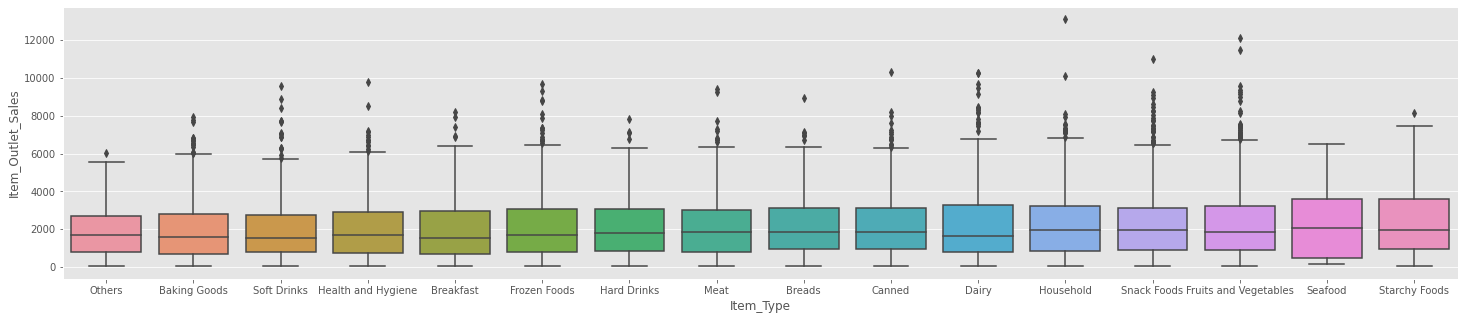

In [ ]:
items_ordenados = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [25, 5]
#plt.ylim(0,4000)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, order= items_ordenados)

- Con más zoom, acotando el límite máximo del eje y.

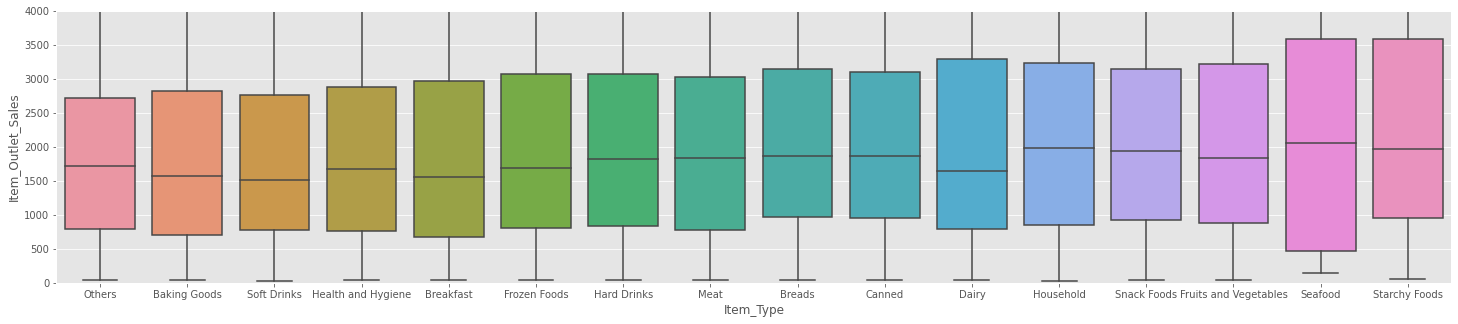

In [ ]:
items_ordenados = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [25, 5]
plt.ylim(0,4000)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, order= items_ordenados)

In [ ]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

- Se observa una relación (no tan marcada) entre el tipo de alimento y las ventas. Entre la familia "Others" y "Starchy Foods" hay una diferencia menor a 500 puntos a favor de la última en promedio con respecto a las ventas. La desviación estandar de las ventas es de 1706 puntos (vs 448 de diferencia entre las categorías extremas).

### Boxplot de ventas por contenido de grasa de los productos

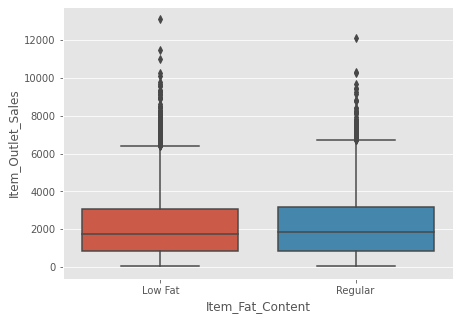

In [ ]:
items_ordenados = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [7, 5]
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, order= items_ordenados);

In [ ]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values()

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

- No se observan diferencias considerables en promedio de ventas de alimentos bajos en grasa y regulares.

### Boxplot de ventas por tienda

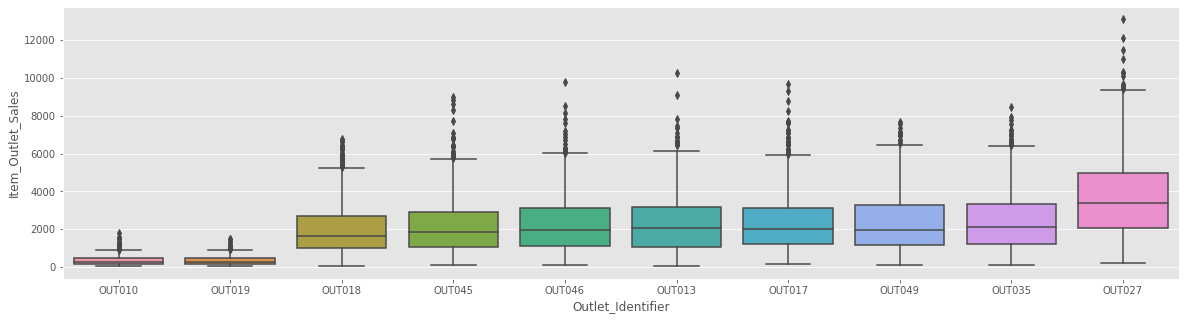

In [ ]:
items_ordenados = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [20, 5]
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, order= items_ordenados)

In [ ]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values()

Outlet_Identifier
OUT010     339.351662
OUT019     340.329723
OUT018    1995.498739
OUT045    2192.384798
OUT046    2277.844267
OUT013    2298.995256
OUT017    2340.675263
OUT049    2348.354635
OUT035    2438.841866
OUT027    3694.038558
Name: Item_Outlet_Sales, dtype: float64

- Se observan a grandes rasgos 3 grupos bien diferenciados:
  - Las tiendas 010 y 019 venden en promedio menos que todas las otras. Este promedio no supera las 350 unidades.
  - La distribución de las ventas de las tiendas 018, 045, 046, 049, 017, 013 y 035 son "similares" y venden en promedio más que las 2 tiendas del punto anterior. Estos promedios van desde 1995 hasta 2438 unidades.
  - La tienda OUT027 es la que más vende, con un promedio de ventas de 3694 unidades, superior a todas las demás tiendas.

### Boxplot de ventas por tamaño de tienda

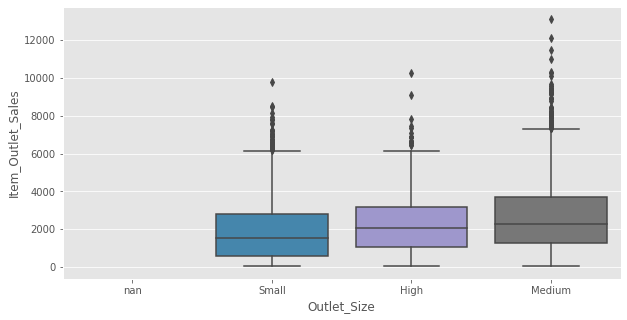

In [ ]:
items_ordenados = df.groupby('Outlet_Size', dropna= False)['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [10, 5]
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, order= items_ordenados)

In [ ]:
df.groupby('Outlet_Size', dropna= False)['Item_Outlet_Sales'].mean().sort_values()

Outlet_Size
NaN       1822.626947
Small     1912.149161
High      2298.995256
Medium    2681.603542
Name: Item_Outlet_Sales, dtype: float64

- Para esta variable, se observa una relación directa entre el tamaño de la tienda y las ventas. Siendo el tamaño que más vende en promedio el "Medium", seguido por "High" y por último "Small". No olvidar que esta columna en el dataset presenta valores Nan, que son los datos que le faltan a las tiendas OUT010, 017 y 045.

### Boxplot de ventas por localización  de la tienda

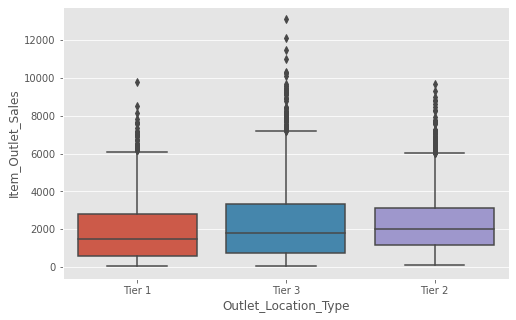

In [ ]:
items_ordenados = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [8, 5]
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, order= items_ordenados)

In [ ]:
df.groupby('Outlet_Location_Type', dropna= False)['Item_Outlet_Sales'].mean().sort_values()

Outlet_Location_Type
Tier 1    1876.909159
Tier 3    2279.627651
Tier 2    2323.990559
Name: Item_Outlet_Sales, dtype: float64

- Para esta variable, se observa una relación entre la localización de la tienda y las ventas. La localización que más vende en promedio es "Tier 2" seguida por "Tier 3" y por último "Tier 1".

### Boxplot de ventas por tipo de tienda

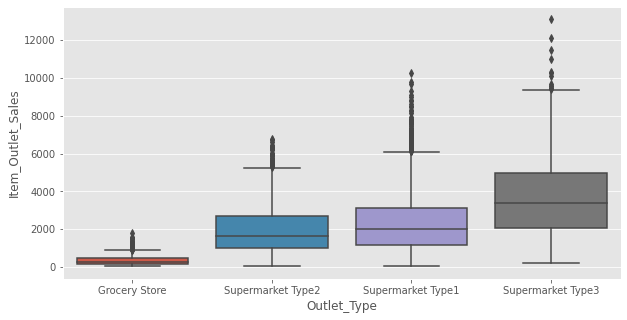

In [ ]:
items_ordenados = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [10, 5]
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, order= items_ordenados)

In [ ]:
df.groupby('Outlet_Type', dropna= False)['Item_Outlet_Sales'].mean().sort_values()

Outlet_Type
Grocery Store         339.828500
Supermarket Type2    1995.498739
Supermarket Type1    2316.181148
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

- Sin duda esta variable categórica hasta el momento es la que más relación directa se observa con las ventas. La diferencia de promedio de ventas entre cada categoría sugiere que están muy relacionadas con las ventas.

### Boxplot de ventas por id de producto

In [ ]:
#plt.rcParams["figure.figsize"] = [25, 5]
#sns.boxplot(x='Item_Identifier', y='Item_Outlet_Sales', data=df)

- No tiene sentido graficar esta variable ya que contiene más de 1500 distintos productos y aumenta el costo computacional sin que valga la pena.

## 1.7 - Análisis de Item_Visibility vs Outlet_Type

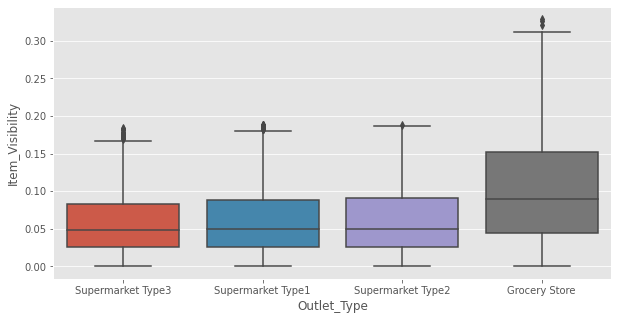

In [ ]:
items_ordenados = df.groupby('Outlet_Type')['Item_Visibility'].mean().sort_values().index
plt.rcParams["figure.figsize"] = [10, 5]
sns.boxplot(x='Outlet_Type', y='Item_Visibility', data=df, order= items_ordenados)

- Al analizar todas las variables categóricas y numéricas y su relación con las ventas, se encontró que el efecto que provoca el scoring de visibilidad de los productos, está directamente relacionado con el tipo de tienda. En esta gráfica se observa este fenómeno. Por lo tanto en futuros modelos si se incluye a la variable categórica Outlet_Type, no será necesario incluir a la variable numércia Item_Visibility. De esta manera evitamos errores por diferencia de escalado.

# 2 - Dataset TEST. Análisis Exploratorio

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Big Mart Sales/Test_BigMart.csv")

In [ ]:
df_test.shape

(5681, 11)

- 5681 filas con 11 columnas

In [ ]:
df_test.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

- No figura la columna con las ventas (Item_Outlet_Sales)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- De la info se observan 2 columnas con valores nulos o Nan.

In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 2.1 - Análisis de los valores Nan del dataset Test

In [ ]:
print("Hay {} filas que tienen todos sus valores Nan.".format(len(df_test[df_test.isnull().all(axis=1)])))

Hay 0 filas que tienen todos sus valores Nan.


- No existen filas con todos sus valores Nan.

In [ ]:
print("Hay {} filas que tienen al menos 1 valor Nan.".format(len(df_test[df_test.isnull().any(axis=1)])))

Hay 2582 filas que tienen al menos 1 valor Nan.


In [ ]:
df_test[df_test.isnull().any(axis=1)].index

Int64Index([   1,    2,    3,    4,    7,    8,    9,   10,   11,   12,
            ...
            5656, 5661, 5662, 5665, 5668, 5669, 5670, 5678, 5679, 5680],
           dtype='int64', length=2582)

- Índice de las filas que contienen al menos un valor Nan.

### Cantidad de NaN en el Dataset por columnas

Text(0.5, 1.0, 'Cantidad de Nan por cada columna')

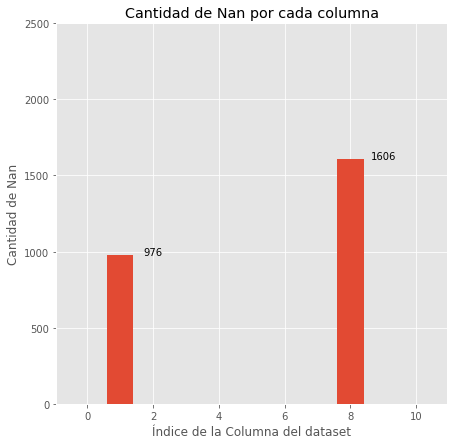

In [ ]:
x00 = []
y00 = []
for j in range(len(df_test.columns)):
  y_cant = len(df_test) - (df_test[df_test.columns.values[j]].isnull().value_counts()[0])
  x_name = j
  x00.append(x_name)
  y00.append(y_cant)
plt.figure(figsize=(7,7)) 
plt.bar(x00,y00)
def add_value_label(x,y):
    for i in range(1, len(x00)+1):
        if y[i-1] > 10:
          plt.text(i,y[i-1],y[i-1], horizontalalignment='center')
add_value_label(x00,y00)
plt.xlabel("Índice de la Columna del dataset")
plt.ylabel("Cantidad de Nan")
plt.ylim(0, 2500)
plt.title("Cantidad de Nan por cada columna")

#### Nombre de columnas con más de "n" valores Nan.

In [ ]:
n = 10 # limite de corte de cantidad de Nan
labels00 = []
for j in range(len(y00)):
  if y00[j] > n:
    labels00.append(df_test.columns.values[j])
print(labels00)

['Item_Weight', 'Outlet_Size']


### Cantidad de Nan por filas

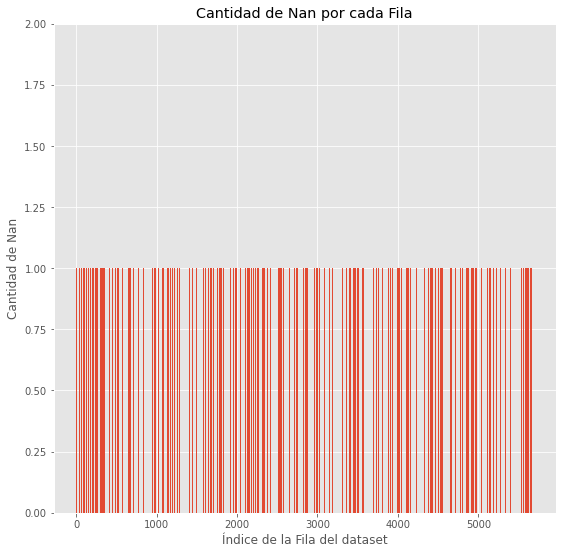

In [ ]:
cant = []
indices = df_test[df_test.isnull().any(axis=1)].index
for f in range(len(indices)):
  cant.append(df_test.iloc[indices[f],:].isnull().value_counts()[1])
  #print("La fila {} tiene {} NaN".format(indices[f], cant[-1]))
plt.figure(figsize=(9,9)) 
plt.bar(indices, cant)
plt.xlabel("Índice de la Fila del dataset")
plt.ylabel("Cantidad de Nan")
plt.ylim(0, 2)
plt.title("Cantidad de Nan por cada Fila")
plt.show()

### Conclusión de los Nan: 

- De los 2582 Nan de todo el dataset de test, 976 pertecen a la columna "Item_weight" y 1606 a la columna "Outlet_Size". Para todos los casos, siempre hay 1 sólo valor Nan como máximo por cada fila analizada. Es decir que ninguna fila posee más de 1 valor nulo y este es en el peso o en el tamaño de la tienda. Por ahora no se tomará ninguna medida o decisión con respecto a esto, se hará algo o no en función del modelo que se plantee.

# 3 - Modelos

Para comenzar, se va a plantear como modelo predictivo para las ventas por productos (Item_Outlet_Sales), una Regresión Lineal Simple; siendo este el más simple de todos los modelos de regresión. Luego se irá complejizando para aumentar su poder predictivo, de ser necesario.

## 3.1 - Modelo de Regresión Lineal Simple

- La regresión lineal simple intenta predecir una respuesta cuantitativa "Y" en base a una única variable predictora "X". 
Se asume que hay aproximadamente una relación lineal entre "X" e "Y". 

- Matemáticamente:  $$ Y  \approx \hat {\beta}_{0} +  \hat {\beta}_{1} \cdot X $$

- Esta es la ecuación de una recta en un plano (x, y) donde 𝛽0 y 𝛽1 son dos constantes que representan el intercepto (ordenada al origen)  y la pendiente de la recta del modelo lineal. 

- 𝛽0 y 𝛽1 son los **parámetros del modelo**.

### 3.1.1 - Modelo planteado y Parámetros del mismo

Modelo planteado: $$ Item Outlet Sales  \approx \hat {\beta}_{0} +  \hat {\beta}_{1} \cdot Item_MRP $$

La variable predictora elegida para dicho modelo será "Item_MRP" ya que es la variable numérica que mayor coeficiente de correlación tiene con las ventas (Item_Outlet_Sales).

Los parámetors 𝛽0 y 𝛽1 se estimarán de tal manera que minimicen la distancia entre la línea recta y los verdaderos valores que observamos en el dataset.

In [ ]:
df_model = df.copy()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

- Definimos la "X" y la "y" con las que vamos a entrenar nuestro modelo.

In [ ]:
X = df_model.loc[:,['Item_MRP']]
y = df_model['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_MRP
0,249.8092
1,48.2692
2,141.6180
3,182.0950
4,53.8614


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
model.fit(X,y)

LinearRegression()

### 3.1.2 - Coeficientes Estimados

In [ ]:
model.coef_

array([15.55302354])

In [ ]:
model.intercept_

-11.575142825172861

<strong> Resultado </strong>

$ \hat {\beta}_{0} = -11.575142825172861 $


$ \hat {\beta}_{1} = 15.55302354 $


In [ ]:
y_predict_train = model.predict(X)

### 3.1.3 - Predicciones de las ventas con los datos del propio dataset de Train:

In [ ]:
y_predict_train

array([3873.71322408,  739.1568608 , 2191.01294418, ..., 1312.33554775,
       1592.45794404, 1162.16488431])

- En rojo la recta de regresión lineal con las predicciones de ventas según el modelo.

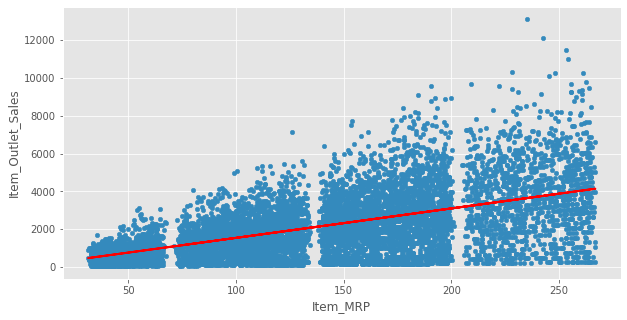

In [ ]:
df_model.plot(kind = "scatter", x = "Item_MRP", y = "Item_Outlet_Sales")
plt.plot(df_model["Item_MRP"], y_predict_train, c = "red", linewidth = 2)
plt.rcParams["figure.figsize"] = [15, 5]

### 3.1.4 - Métricas de Performance del Modelo planteado para conjunto Train


- Importamos librería para las métricas de scikit-learn

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

- Se calcula R2, MSE, RMSE y MAE

In [ ]:
R2 = r2_score(y, y_predict_train)
MSE = mean_squared_error(y, y_predict_train)
RMSE = np.sqrt(mean_squared_error(y, y_predict_train))
MAE = mean_absolute_error(y, y_predict_train)

In [ ]:
metricas_train =  pd.DataFrame({
    'Métrica': ['R2', 'MSE', 'RMSE', 'MAE'],
    'valor': [R2, MSE, RMSE, MAE],
    'tipo_dataset': 'Train'})

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
metricas_train

,Métrica,valor,tipo_dataset
0,R2,0.322,Train
1,MSE,1973790.054,Train
2,RMSE,1404.916,Train
3,MAE,1032.026,Train


### 3.1.5 - Cross Validation con SKLEARN

- Se plantea una validación cruzada dentro del mismo dataset de Train para el R2. Luego se hace un promedio de las n validaciones. En este caso se plantean 5.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_RLS = cross_val_score(model, X, y, cv=5)
scores_RLS

array([0.33744676, 0.32831863, 0.31653293, 0.3206585 , 0.30439208])

In [ ]:
print("El promedio de R2 de Cross Validation es {:.3f}.".format(scores_RLS.mean()))

El promedio de R2 de Cross Validation es 0.321.


- El promedio de las 5 validaciones cruzadas es prácticamente igual a la primer métrica de R2 estimada.

### 3.1.6 - Error del Modelo (comportamiento del mismo)

- Error del modelo, relativo al promedio de los datos de ventas.

In [ ]:
prom_ventas = np.mean(df_model['Item_Outlet_Sales'])
prom_ventas

2181.288913575032

In [ ]:
error = RMSE / prom_ventas

In [ ]:
error*100

64.40762514833438

- Este resultado se interpreta como que la "peor" predicción de las ventas que puedo realizar es la media de las mismas. Entonces se compara el RMSE de nuestro modelo con respecto a ese promedio. Si fueran valores iguales el error sería de un 100%, si fuera la mitad, sería un 50% y así sucesivamente.
- En este caso da 64,4 %, lo cual se considera un resultado pobre.

#### Se cacula el residuo de los errores

In [ ]:
residuos_ventas = y - y_predict_train

Text(0, 0.5, 'residuos_ventas (error)')

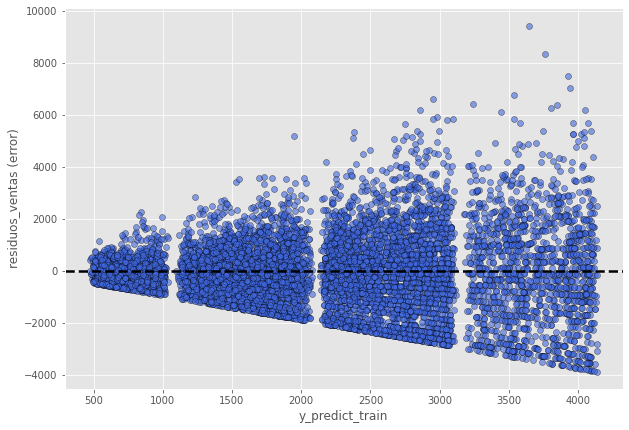

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_predict_train, y=residuos_ventas,
            alpha=0.6, c='royalblue', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.xlabel("y_predict_train")
plt.ylabel("residuos_ventas (error)")

#### Histograma para el residuo

(array([2.840e+02, 1.158e+03, 3.500e+03, 2.485e+03, 7.910e+02, 2.210e+02,
        6.300e+01, 1.700e+01, 2.000e+00, 2.000e+00]),
 array([-3871.24741894, -2539.75820357, -1208.2689882 ,   123.22022717,
         1454.70944254,  2786.19865791,  4117.68787327,  5449.17708864,
         6780.66630401,  8112.15551938,  9443.64473475]),
 <a list of 10 Patch objects>)

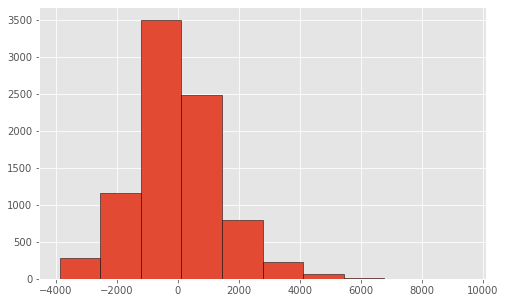

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
plt.hist(residuos_ventas, edgecolor= "k")

In [ ]:
residuos_ventas.describe()

count    8523.000
mean        0.000
std      1404.999
min     -3871.247
25%      -770.052
50%       -63.995
75%       696.351
max      9443.645
Name: Item_Outlet_Sales, dtype: float64

### 3.1.7 - Evaluación del modelo de regresión lineal simple con Statsmodel


Para comparar los resultados obtenidos con "sklearn" y complementar la información obtenida, se utilizarán herramientas de la librería statsmodel, implementando el modelo lineal de esta última.

- En statsmodels se agrega el intercepto aparte, generando una constante.

In [ ]:
X_train_modelo_Item_MRP_stats = sm.add_constant(X)
X_train_modelo_Item_MRP_stats.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Item_MRP
0,1.000,249.809
1,1.000,48.269
2,1.000,141.618
3,1.000,182.095
4,1.000,53.861


- Construimos el modelo

In [ ]:
modelo_Item_MRP_stats = sm.OLS(y, X_train_modelo_Item_MRP_stats)

In [ ]:
resultados_modelo_Item_MRP_stats = modelo_Item_MRP_stats.fit()

In [ ]:
resultados_modelo_Item_MRP_stats.params

const      -11.575
Item_MRP    15.553
dtype: float64

- Se observa que los coeficientes estimados son iguales a los que obtuvimos utilizando la implementación de scikit learn.

#### Test de significancia individual. Modelo de Regresión Lineal Simple

Test individual. Se plantea la hipótesis nula de que los coeficientes de la recta de la regresión lineal son nulos y como hipótesis alternativa que son distintos de cero.

$H_0: \beta_j = 0$

$H_A: \beta_j \neq 0$

Para rechazar la hipótesis nula de que el parámetro $\beta_j$ es igual a cero debemos observar un p valor inferior a 0.05. Por eso accedemos a los p-valores de los tests de significancia individual, haciendo uso de statsmodel.

In [ ]:
resultados_modelo_Item_MRP_stats.pvalues

const      0.759
Item_MRP   0.000
dtype: float64

- Para la constante o intercepto no podemos rechazar la hipótesis nula.
- Para el coeficiente de la variable Item_MRP si podemos rechazar la hipótesis nula, sumando así otra evidencia de la implicancia de una relación directa entre estas variables.

#### Test de significatividad global. Modelo de Regresión Lineal Simple

Las hipotesis son:

$H_0: \text{Todos los } \beta_j = 0$

$H_A: \text{Algún } \beta_j \neq 0$


In [ ]:
resultados_modelo_Item_MRP_stats.f_pvalue

0.0

- Podemos rechazar la hipótesis nula.

#### Métricas modelo de RLS con statsmodel

- R-cuadrado y R-cuadrado-ajustado.

In [ ]:
resultados_modelo_Item_MRP_stats.rsquared

0.3221407524979082

In [ ]:
resultados_modelo_Item_MRP_stats.rsquared_adj

0.3220612008904089

Imprimiendo el "summary" de los resultados tenemos toda la info del modelo resumida:



In [ ]:
print(resultados_modelo_Item_MRP_stats.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:23:04   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5751     37.671     -0.307      0.7

### 3.1.8 - Validacion del modelo de regresión Lineal Simple en Dataset de TEST

In [ ]:
df_model_test = df_test.copy()

In [ ]:
X_test = df_model_test.loc[:,['Item_MRP']]
X_test.head()

,Item_MRP
0,107.862
1,87.320
2,241.754
3,155.034
4,234.230


#### Predicciones de las ventas con los datos del dataset de Test:

In [ ]:
y_predict_test = model.predict(X_test)

In [ ]:
y_predict_test

array([1666.00819233, 1346.51176166, 3748.4273983 , ..., 1835.25308384,
       3326.44276374, 1229.49392319])

#### Gráficas

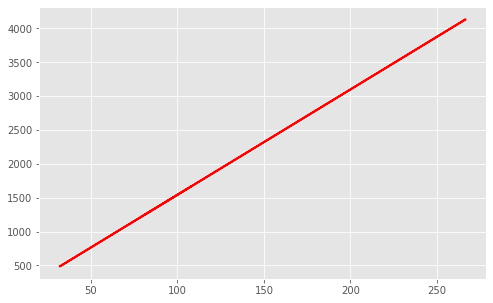

In [ ]:
plt.plot(df_model_test["Item_MRP"], y_predict_test, c = "red", linewidth = 2)
plt.rcParams["figure.figsize"] = [7, 5]

- Faltan los datos de la columna "Item_Outlet_Sales" del dataset de test para poder calcular la performance del modelo de regresión simple en dicho dataset.

In [ ]:
df_model_test["Y_pred_test"] = pd.DataFrame(y_predict_test)
df_model_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Y_pred_test
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1,1666.008
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1,1346.512
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store,3748.427
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1,2399.672
4,FDY38,NaN,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3,3631.410


#### Distribución de las ventas predichas sobre el dataset Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2895bd2110>]],
      dtype=object)

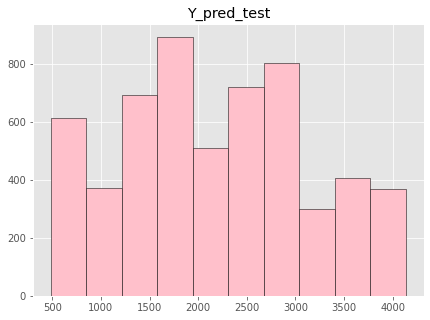

In [ ]:
df_model_test.hist('Y_pred_test', color= "pink" , edgecolor="k")

In [ ]:
df_model_test['Y_pred_test'].describe()

count   5681.000
mean    2181.763
std      961.318
min      485.966
25%     1456.817
50%     2187.862
75%     2881.701
max     4134.681
Name: Y_pred_test, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()

count    8523.000
mean     2181.289
std      1706.500
min        33.290
25%       834.247
50%      1794.331
75%      3101.296
max     13086.965
Name: Item_Outlet_Sales, dtype: float64

Observación: 
- El promedio de ventas del dataset de Train es igual que el promedio de ventas predicho según los datos del dataset de Test y la dispersión de los datos es mucho menor para este último.

### 3.1.9 - Conclusión: 
- El modelo de Regresión Simple es pobre, en el sentido que su valor de R2 es bajo (0.322) y sus otras métricas de errores son altas. El modelo tiene un error de 64.4% (respecto al promedio de los datos).

## 3.2 Modelo de Regresión Múltiple

Para intentar mejorar la performance del modelo obtenido se procederá a desarrollar un modelo de regresión lineal múltiple, cuya ecuación general es la siguiente:

$Y \approx \hat \beta_0 + \hat\beta_1 \cdot X_1 + \hat\beta_2  \cdot X_2 + ... + \hat\beta_p \cdot X_p $

Para el caso particlar de estudio y considerando todo el análisis previo realizado, el modelo a plantear es el siguiente:

### 3.2.1 Modelo planteado y Parámetros del mismo:


$ Item Outlet Sales  \approx \hat {\beta}_{0} +  \hat {\beta}_{1} \cdot ItemMRP + \hat {\beta}_{2} \cdot OutletType $

$ Item Outlet Sales = \hat\beta_0 + \hat\beta_1 \cdot ItemMRP + \hat \beta_{2}  \cdot X_{Supermarket Type1} + \hat\beta_{3}  \cdot X_{Supermarket Type 2} + \hat\beta_{4}  \cdot X_{Supermarket Type 3} $

El motivo de esta elección es sumar a la variable numérica con mayor correlación con las ventas (Item_MRP) la variable categórica que más impacto tienen sus categorías con las ventas; ésta es "Outlet_Type" y sus categorías son:
- Grocery_Store
- Supermarket_Type1
- Supermarket_Type2
- Supermarket_Type1

Para esto debemos convertir esta variable a variables "dummies". Las variables dummies que se crearán y de la siguiente manera son:

$X_{Supermarket Type1}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 1} \\
      1 & \text{si es un supermercado tipo 1}
\end{cases}$

$X_{Supermarket Type2}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 2} \\
      1 & \text{si es un supermercado tipo 2}
\end{cases}$

$X_{Supermarket Type3}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 3} \\
      1 & \text{si es un supermercado tipo 3}
\end{cases}$

La variable $X_{Grocery Store}$ quedaría implícita en el intercepto $\hat\beta_0$

In [ ]:
df_model_2 = df.copy()
df_model_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


- Primero, la variable a precidir la paso a nombrar 'y'.

In [ ]:
df_model_2.rename(columns={'Item_Outlet_Sales': 'y', 
                           }, inplace=True)

In [ ]:
df_model_2.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'y'], dtype=object)

In [ ]:
var_exogenas_train_m2 = ['Item_MRP', 'Outlet_Type']

In [ ]:
categories_m2 = df_model_2[var_exogenas_train_m2].columns.values.tolist()
categories_m2

['Item_MRP', 'Outlet_Type']

In [ ]:
categories_m2.remove("Item_MRP")

In [ ]:
categories_m2

['Outlet_Type']

- Creación de variables dummies:

In [ ]:
for category in categories_m2:
  cat_list = "cat" + "_" + category
  cat_dummies = pd.get_dummies(df_model_2[category], prefix = cat_list, drop_first=True)
  data_new = df_model_2.join(cat_dummies)
  df_model_2 = data_new

In [ ]:
df_data_m2 = df_model_2.drop(columns= categories_m2)

In [ ]:
df_data_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    8523 non-null   object 
 1   Item_Weight                        7060 non-null   float64
 2   Item_Fat_Content                   8523 non-null   object 
 3   Item_Visibility                    8523 non-null   float64
 4   Item_Type                          8523 non-null   object 
 5   Item_MRP                           8523 non-null   float64
 6   Outlet_Identifier                  8523 non-null   object 
 7   Outlet_Establishment_Year          8523 non-null   int64  
 8   Outlet_Size                        6113 non-null   object 
 9   Outlet_Location_Type               8523 non-null   object 
 10  y                                  8523 non-null   float64
 11  cat_Outlet_Type_Supermarket Type1  8523 non-null   uint8

In [ ]:
df_data_m2["y"].isnull().value_counts()

False    8523
Name: y, dtype: int64

In [ ]:
X_2 = df_data_m2.iloc[:,[5,11,12,13]]

In [ ]:
X_2.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3
0,249.809,1,0,0
1,48.269,0,1,0
2,141.618,1,0,0
3,182.095,0,0,0
4,53.861,1,0,0


In [ ]:
Y = df_data_m2["y"]

In [ ]:
Y.head()

0   3735.138
1    443.423
2   2097.270
3    732.380
4    994.705
Name: y, dtype: float64

- Al ya tener las variables predictoras en forma de pandas DataFrame y la variable a predecir en forma de serie de pandas, podemos pasar a la creación del modelo de regresión con sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo_2_ventas = LinearRegression(fit_intercept=True)

In [ ]:
modelo_2_ventas.fit(X_2, Y)

LinearRegression()

### 3.2.2 - Coeficientes Estimados

In [ ]:
modelo_2_ventas.coef_

array([  15.56162112, 1962.04831075, 1634.13379316, 3361.88033181])

- Intercepto

In [ ]:
modelo_2_ventas.intercept_

-1843.3842778598232

In [ ]:
coeficientes =  pd.DataFrame({
    'Coef': ['𝛽0', '𝛽1', '𝛽2', '𝛽3', '𝛽4'],
    'valor': [modelo_2_ventas.intercept_, modelo_2_ventas.coef_[0],modelo_2_ventas.coef_[1], modelo_2_ventas.coef_[2], modelo_2_ventas.coef_[3]],
    'tipo_dataset': 'Train'})

In [ ]:
coeficientes

,Coef,valor,tipo_dataset
0,𝛽0,-1843.384,Train
1,𝛽1,15.562,Train
2,𝛽2,1962.048,Train
3,𝛽3,1634.134,Train
4,𝛽4,3361.880,Train


### 3.2.3 - Predicciones de las ventas con los propios datos del dataset de Train:

In [ ]:
y_predict_train_m2 = modelo_2_ventas.predict(X_2)

In [ ]:
y_predict_train_m2

array([4006.10015561,  541.89651747, 2322.46969268, ..., 1443.30657053,
       1395.6692986 , 1293.05289396])

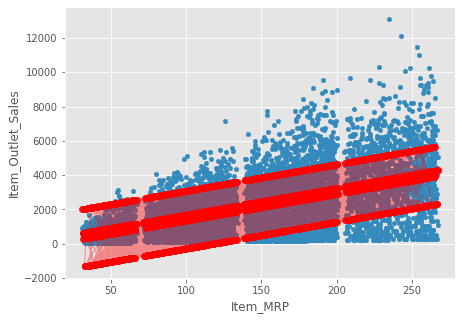

In [ ]:
df_model.plot(kind = "scatter", x = "Item_MRP", y = "Item_Outlet_Sales")
plt.plot(df_data_m2["Item_MRP"], y_predict_train_m2, c = "red", linewidth = 1, alpha=0.4)
plt.scatter(df_data_m2["Item_MRP"], y_predict_train_m2, c = "red", linewidth = 1, alpha=0.8)
plt.rcParams["figure.figsize"] = [15, 5]

### 3.2.4 - Métricas de Performance del Modelo planteado para conjunto Train


- Importamos librería para las métricas de scikit-learn

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

- Se calcula R2, MSE, RMSE y MAE

In [ ]:
R2 = r2_score(y, y_predict_train_m2)
MSE = mean_squared_error(y, y_predict_train_m2)
RMSE = np.sqrt(mean_squared_error(y, y_predict_train_m2))
MAE = mean_absolute_error(y, y_predict_train_m2)

In [ ]:
metricas_train_m2 =  pd.DataFrame({
    'Métrica': ['R2', 'MSE', 'RMSE', 'MAE'],
    'valor': [R2, MSE, RMSE, MAE],
    'tipo_dataset': 'Train'})

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
metricas_train_m2

,Métrica,valor,tipo_dataset
0,R2,0.562,Train
1,MSE,1275230.389,Train
2,RMSE,1129.261,Train
3,MAE,836.588,Train


### 3.2.4 - Cross Validation con SKLEARN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_RLM = cross_val_score(modelo_2_ventas, X_2, y, cv= 5)
scores_RLM

array([0.57126296, 0.55384369, 0.54753344, 0.56696311, 0.56517935])

In [ ]:
scores_RLM.mean()
print("El promedio de R2 con Cross Validation es {:.3f}".format(scores_RLM.mean()))

El promedio de R2 con Cross Validation es 0.561


### 3.2.5 - Error del Modelo de Regresión Múltiple (comportamiento del mismo)

- Error del modelo, relativo al promedio de los datos de ventas.

In [ ]:
prom_ventas = np.mean(df_model['Item_Outlet_Sales'])
prom_ventas

2181.288913575032

In [ ]:
error = RMSE / prom_ventas

In [ ]:
error*100

51.770353999823485

#### Se cacula el residuo de los errores

In [ ]:
residuos_ventas_m2 = y - y_predict_train_m2

Text(0, 0.5, 'residuos_ventas (error)')

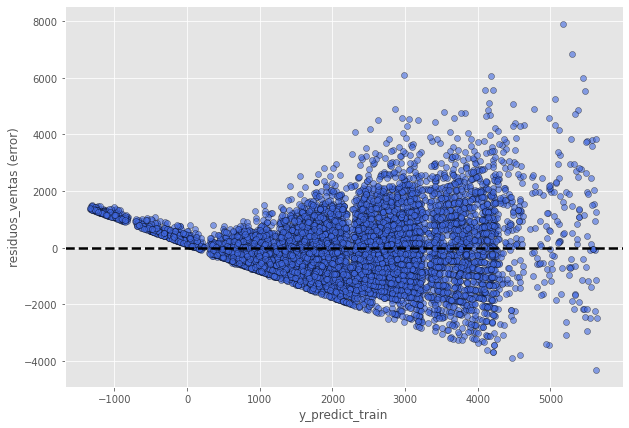

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_predict_train_m2, y=residuos_ventas_m2,
            alpha=0.6, c='royalblue', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.xlabel("y_predict_train")
plt.ylabel("residuos_ventas (error)")

#### Histograma para el residuo

(array([2.800e+01, 2.720e+02, 1.955e+03, 4.166e+03, 1.579e+03, 4.010e+02,
        8.800e+01, 2.600e+01, 6.000e+00, 2.000e+00]),
 array([-4298.52919062, -3077.52095739, -1856.51272417,  -635.50449094,
          585.50374229,  1806.51197551,  3027.52020874,  4248.52844196,
         5469.53667519,  6690.54490842,  7911.55314164]),
 <a list of 10 Patch objects>)

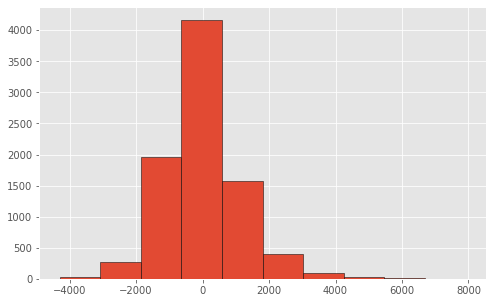

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
plt.hist(df_model['Item_Outlet_Sales'] - y_predict_train_m2, edgecolor= "k")

In [ ]:
residuos_ventas_m2.describe()

count    8523.000
mean        0.000
std      1129.327
min     -4298.529
25%      -672.471
50%       -76.733
75%       567.989
max      7911.553
Name: Item_Outlet_Sales, dtype: float64

### 3.2.6 - Evaluación del modelo de regresión lineal múltiple con Statsmodel


Para comparar los resultados obtenidos con "sklearn" y complementar la información obtenida, se utilizarán herramientas de la librería statsmodel, implementando el modelo lineal de esta última.

- En statsmodels se agrega el intercepto aparte, generando una constante.

In [ ]:
X_train_modelo_RLM_stats2 = sm.add_constant(X_2)
X_train_modelo_RLM_stats2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3
0,1.000,249.809,1,0,0
1,1.000,48.269,0,1,0
2,1.000,141.618,1,0,0
3,1.000,182.095,0,0,0
4,1.000,53.861,1,0,0


- Construimos el modelo

In [ ]:
modelo_RLM_stats2 = sm.OLS(y, X_train_modelo_RLM_stats2)

In [ ]:
resultados_modelo_RLM_stats = modelo_RLM_stats2.fit()

In [ ]:
resultados_modelo_RLM_stats.params

const                               -1843.384
Item_MRP                               15.562
cat_Outlet_Type_Supermarket Type1    1962.048
cat_Outlet_Type_Supermarket Type2    1634.134
cat_Outlet_Type_Supermarket Type3    3361.880
dtype: float64

- Se observa que los coeficientes estimados son iguales a los que obtuvimos utilizando la implementación de scikit learn.

#### Test de significancia individual. Modelo de Regresión Múltiple.

Test individual. Se plantea la hipótesis nula de que los coeficientes de la regresión múltiple son nulos y como hipótesis alternativa que son distintos de cero.

$H_0: \beta_j = 0$

$H_A: \beta_j \neq 0$

Para rechazar la hipótesis nula de que el parámetro $\beta_j$ es igual a cero debemos observar un p valor inferior a 0.05. Por eso accedemos a los p-valores de los tests de significancia individual, haciendo uso de statsmodel.

In [ ]:
resultados_modelo_RLM_stats.pvalues

const                               0.000
Item_MRP                            0.000
cat_Outlet_Type_Supermarket Type1   0.000
cat_Outlet_Type_Supermarket Type2   0.000
cat_Outlet_Type_Supermarket Type3   0.000
dtype: float64

- Para todos los coeficientes del modelo si podemos rechazar la hipótesis nula, sumando así otra evidencia de la implicancia de una relación directa entre estas variables y las ventas.

#### Test de significatividad global. Modelo de Regresión Lineal Múltiple.

Las hipotesis son:

$H_0: \text{Todos los } \beta_j = 0$

$H_A: \text{Algún } \beta_j \neq 0$


In [ ]:
resultados_modelo_RLM_stats.f_pvalue

0.0

- Podemos rechazar la hipótesis nula.

#### Métricas del modelo de RLM con statsmodel

- R-cuadrado y R-cuadrado-ajustado.

In [ ]:
resultados_modelo_RLM_stats.rsquared

0.5620472856555186

In [ ]:
resultados_modelo_RLM_stats.rsquared_adj

0.5618416257755728

Imprimiendo el "summary" de los resultados tenemos toda la info del modelo resumida:



In [ ]:
print(resultados_modelo_RLM_stats.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2733.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:23:06   Log-Likelihood:                -72004.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8518   BIC:                         1.441e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### 3.2.7 - Validacion del modelo de regresión Lineal Múltiple en Dataset de TEST

- Se pondrá a prueba el modelo obtenido anteriormente con los datos del archivo del dataset de Test.

In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df_model_RLM_test = df_test.copy()

In [ ]:
df_model_RLM_test.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

#### Creación de dataset test con variables dummies

In [ ]:
var_exogenas_test_RLM = ['Item_MRP', 'Outlet_Type']

In [ ]:
categories_RLM = df_model_RLM_test[var_exogenas_test_RLM].columns.values.tolist()
categories_RLM

['Item_MRP', 'Outlet_Type']

In [ ]:
categories_RLM.remove("Item_MRP")

In [ ]:
categories_RLM

['Outlet_Type']

- Creación de variables dummies:

In [ ]:
for category in categories_RLM:
  cat_list = "cat" + "_" + category
  cat_dummies = pd.get_dummies(df_model_RLM_test[category], prefix = cat_list, drop_first=True)
  data_new = df_model_RLM_test.join(cat_dummies)
  df_model_RLM_test = data_new

In [ ]:
df_model_RLM_test = df_model_RLM_test.drop(columns= categories_m2)

In [ ]:
df_model_RLM_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    5681 non-null   object 
 1   Item_Weight                        4705 non-null   float64
 2   Item_Fat_Content                   5681 non-null   object 
 3   Item_Visibility                    5681 non-null   float64
 4   Item_Type                          5681 non-null   object 
 5   Item_MRP                           5681 non-null   float64
 6   Outlet_Identifier                  5681 non-null   object 
 7   Outlet_Establishment_Year          5681 non-null   int64  
 8   Outlet_Size                        4075 non-null   object 
 9   Outlet_Location_Type               5681 non-null   object 
 10  cat_Outlet_Type_Supermarket Type1  5681 non-null   uint8  
 11  cat_Outlet_Type_Supermarket Type2  5681 non-null   uint8

In [ ]:
X_test_RLM = df_model_RLM_test.iloc[:,[5,10,11,12]]

In [ ]:
X_test_RLM.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3
0,107.862,1,0,0
1,87.320,1,0,0
2,241.754,0,0,0
3,155.034,1,0,0
4,234.230,0,0,1


#### Predicciones de ventas con los datos del dataset de Test

In [ ]:
y_predict_test_RLM = modelo_2_ventas.predict(X_test_RLM)

In [ ]:
y_predict_test_RLM

array([1797.17472247, 1477.50167678, 1918.69676208, ..., 1966.51317118,
       3458.5271686 , 1360.41915179])

#### Gráficas

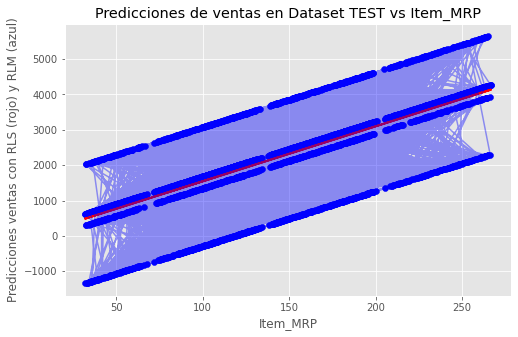

In [ ]:
plt.plot(df_model_test["Item_MRP"], y_predict_test, c = "red", linewidth = 2)
plt.plot(df_model_RLM_test["Item_MRP"], y_predict_test_RLM, c = "blue", alpha=0.4)
plt.scatter(df_model_RLM_test["Item_MRP"], y_predict_test_RLM, c = "blue")
plt.xlabel("Item_MRP")
plt.ylabel("Predicciones ventas con RLS (rojo) y RLM (azul)")
plt.title("Predicciones de ventas en Dataset TEST vs Item_MRP")
plt.rcParams["figure.figsize"] = [7, 5]

- Faltan los datos de la columna "Item_Outlet_Sales" del dataset de test para poder calcular la performance del modelo de regresión múltiple en dicho dataset.

- Se observa que  las predicciones de ventas en el caso de la regresión múltiple son más abarcativas que para la simple; simulando más la disperción real que se tiene entre estas 2 variables.

In [ ]:
df_model_RLM_test["Y_pred_test_RLM"] = pd.DataFrame(y_predict_test_RLM)
df_model_RLM_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,Y_pred_test_RLM
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,1,0,0,1797.175
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,1,0,0,1477.502
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,0,0,0,1918.697
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,1,0,0,2531.244
4,FDY38,NaN,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,0,0,1,5163.495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2895687210>]],
      dtype=object)

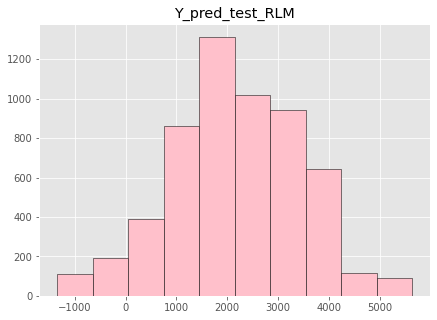

In [ ]:
df_model_RLM_test.hist('Y_pred_test_RLM', color= "pink" , edgecolor="k")

In [ ]:
df_model_RLM_test['Y_pred_test_RLM'].describe()

count    5681.000
mean     2181.943
std      1275.435
min     -1344.012
25%      1341.213
50%      2138.063
75%      3051.871
max      5643.210
Name: Y_pred_test_RLM, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()

count    8523.000
mean     2181.289
std      1706.500
min        33.290
25%       834.247
50%      1794.331
75%      3101.296
max     13086.965
Name: Item_Outlet_Sales, dtype: float64

#### Observación: 
- El promedio de ventas del dataset de Train es igual que el promedio de ventas predicho según los datos del dataset de Test y la dispersión de los datos es mucho menor para este último aunque con valores negativos para la variable a predecir.

## 3.3 - Modelo de Interacción

Se plantea un nuevo modelo con la intención de mejorar la capacidad predictora del mismo. Para ello se va a definir un modelo de interacción de la siguiente manera:

### 3.3.1 - Modelo planteado y Parámetros del mismo:

$ Item Outlet Sales = \hat\beta_0 + \hat\beta_1 \cdot ItemMRP + \hat \beta_{2}  \cdot X_{Supermarket Type1} + \hat\beta_{3}  \cdot X_{Supermarket Type 2} + \hat\beta_{4}  \cdot X_{Supermarket Type 3} + \beta_{5}  \cdot (X_{Supermarket Type1} * ItemMRP) + \beta_{6}  \cdot (X_{Supermarket Type2} * ItemMRP) + \beta_{7}  \cdot (X_{Supermarket Type3} * ItemMRP) $


Para esto debemos convertir esta variable a variables "dummies". Las variables dummies que se crearán y de la siguiente manera son:

$X_{Supermarket Type1}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 1} \\
      1 & \text{si es un supermercado tipo 1}
\end{cases}$

$X_{Supermarket Type2}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 2} \\
      1 & \text{si es un supermercado tipo 2}
\end{cases}$

$X_{Supermarket Type3}=\begin{cases}
      0 & \text{si NO es un supermercado tipo 3} \\
      1 & \text{si es un supermercado tipo 3}
\end{cases}$

La variable $X_{Grocery Store}$ quedaría implícita en el intercepto $\hat\beta_0$



In [ ]:
X_2.columns.values

array(['Item_MRP', 'cat_Outlet_Type_Supermarket Type1',
       'cat_Outlet_Type_Supermarket Type2',
       'cat_Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
X_2_int = X_2.copy()

- Creamos las tres variables de interacción

In [ ]:
X_2_int['interaccion_super1'] = X_2_int['cat_Outlet_Type_Supermarket Type1'] * X_2_int['Item_MRP']
X_2_int['interaccion_super2'] = X_2_int['cat_Outlet_Type_Supermarket Type2'] * X_2_int['Item_MRP']
X_2_int['interaccion_super3'] = X_2_int['cat_Outlet_Type_Supermarket Type3'] * X_2_int['Item_MRP']

In [ ]:
X_2_int.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,interaccion_super1,interaccion_super2,interaccion_super3
0,249.809,1,0,0,249.809,0.000,0.000
1,48.269,0,1,0,0.000,48.269,0.000
2,141.618,1,0,0,141.618,0.000,0.000
3,182.095,0,0,0,0.000,0.000,0.000
4,53.861,1,0,0,53.861,0.000,0.000


In [ ]:
Y.head()

0   3735.138
1    443.423
2   2097.270
3    732.380
4    994.705
Name: y, dtype: float64

- Al ya tener las variables predictoras en forma de pandas DataFrame y la variable a predecir en forma de serie de pandas, podemos pasar a la creación del modelo de regresión (interacción) con sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo_intereacion = LinearRegression(fit_intercept=True)

In [ ]:
modelo_intereacion.fit(X_2_int, Y)

LinearRegression()

### 3.3.2 - Coeficientes estimados

In [ ]:
modelo_intereacion.coef_

array([  2.47269634, -20.9350413 , -68.63003487, 157.21375467,
        14.12760965,  12.14634942,  22.87678193])

- Intercepto (ordenada al origen)

In [ ]:
modelo_intereacion.intercept_

-7.077660373709477

- Pasando en limpio todos los coeficientes del modelo de interacción.

In [ ]:
b0 = modelo_intereacion.intercept_
b1 = modelo_intereacion.coef_[0]
b2 = modelo_intereacion.coef_[1]
b3 = modelo_intereacion.coef_[2]
b4 = modelo_intereacion.coef_[3]
b5 = modelo_intereacion.coef_[4]
b6 = modelo_intereacion.coef_[5]
b7 = modelo_intereacion.coef_[6]

In [ ]:
coeficientes_int =  pd.DataFrame({
    'Coef': ['𝛽0', '𝛽1', '𝛽2', '𝛽3', '𝛽4', '𝛽5', '𝛽6', '𝛽7'],
    'valor': [b0,b1, b2, b3, b4, b5, b6, b7],
    'tipo_dataset': 'Train'})

In [ ]:
coeficientes_int

,Coef,valor,tipo_dataset
0,𝛽0,-7.078,Train
1,𝛽1,2.473,Train
2,𝛽2,-20.935,Train
3,𝛽3,-68.630,Train
4,𝛽4,157.214,Train
5,𝛽5,14.128,Train
6,𝛽6,12.146,Train
7,𝛽7,22.877,Train


### 3.3.3 - Predicciones de las ventas con los propios datos del dataset de Train:

In [ ]:
y_predict_train_interaccion = modelo_intereacion.predict(X_2_int)

In [ ]:
y_predict_train_interaccion

array([4118.89645648,  629.94194837, 2322.88943147, ..., 1385.0451846 ,
       1432.00127497, 1224.76259018])

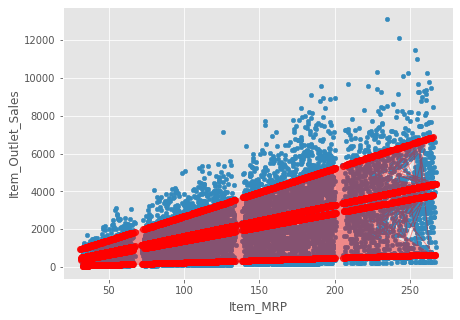

In [ ]:
df_model.plot(kind = "scatter", x = "Item_MRP", y = "Item_Outlet_Sales")
plt.plot(df_data_m2["Item_MRP"], y_predict_train_interaccion, c = "red", linewidth = 1, alpha=0.4)
plt.scatter(df_data_m2["Item_MRP"], y_predict_train_interaccion, c = "red", linewidth = 1, alpha=0.8)
plt.rcParams["figure.figsize"] = [15, 5]

### 3.3.4 - Métricas de Performance del Modelo de Interacción planteado para conjunto Train


- Importamos librería para las métricas de scikit-learn

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

- Se calcula R2, MSE, RMSE y MAE

In [ ]:
R2 = r2_score(y, y_predict_train_interaccion)
MSE = mean_squared_error(y, y_predict_train_interaccion)
RMSE = np.sqrt(mean_squared_error(y, y_predict_train_interaccion))
MAE = mean_absolute_error(y, y_predict_train_interaccion)

In [ ]:
metricas_train_int =  pd.DataFrame({
    'Métrica': ['R2', 'MSE', 'RMSE', 'MAE'],
    'valor': [R2, MSE, RMSE, MAE],
    'tipo_dataset': 'Train'})

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
metricas_train_int

,Métrica,valor,tipo_dataset
0,R2,0.605,Train
1,MSE,1149049.437,Train
2,RMSE,1071.937,Train
3,MAE,750.052,Train


### 3.3.5 - Cross Validation con SKLEARN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_RMI = cross_val_score(modelo_intereacion, X_2_int, y)
scores_RMI

array([0.6177316 , 0.59404585, 0.58655702, 0.61012135, 0.61177152])

In [ ]:
scores_RMI.mean()
print("El promedio de R2 con Cross Validation del modelo de interacción es {:.3f}.".format(scores_RMI.mean()))

El promedio de R2 con Cross Validation del modelo de interacción es 0.604.


### 3.3.6 - Error del Modelo de Interacción (comportamiento del mismo)

- Error del modelo, relativo al promedio de los datos de ventas.

In [ ]:
prom_ventas = np.mean(df_model['Item_Outlet_Sales'])
prom_ventas

2181.288913575032

In [ ]:
error = RMSE / prom_ventas

In [ ]:
error*100

49.14237764767675

#### Se cacula el residuo de los errores

In [ ]:
residuos_ventas_int = y - y_predict_train_interaccion

Text(0, 0.5, 'residuos_ventas (error)')

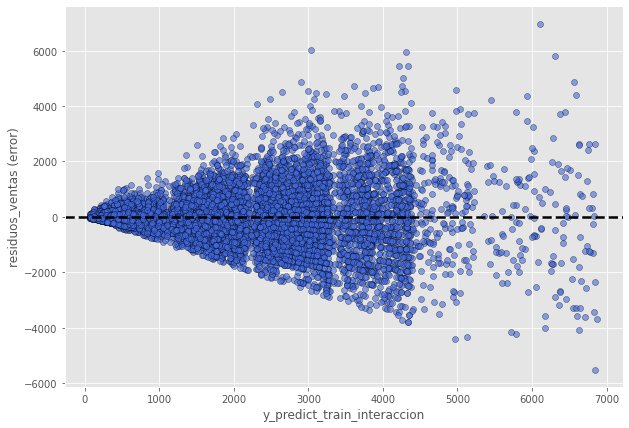

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_predict_train_interaccion, y=residuos_ventas_int,
            alpha=0.6, c='royalblue', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.xlabel("y_predict_train_interaccion")
plt.ylabel("residuos_ventas (error)")

#### Histograma para el residuo

(array([3.000e+00, 4.600e+01, 3.210e+02, 1.803e+03, 4.784e+03, 1.190e+03,
        2.910e+02, 6.600e+01, 1.500e+01, 4.000e+00]),
 array([-5512.09240775, -4262.90238895, -3013.71237015, -1764.52235135,
         -515.33233255,   733.85768625,  1983.04770506,  3232.23772386,
         4481.42774266,  5730.61776146,  6979.80778026]),
 <a list of 10 Patch objects>)

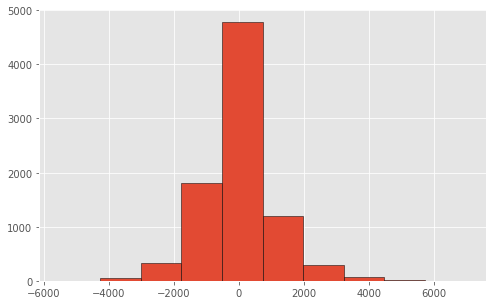

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
plt.hist(df_model['Item_Outlet_Sales'] - y_predict_train_interaccion, edgecolor= "k")

In [ ]:
residuos_ventas_int.describe()

count    8523.000
mean        0.000
std      1072.000
min     -5512.092
25%      -532.628
50%       -55.012
75%       454.966
max      6979.808
Name: Item_Outlet_Sales, dtype: float64

### 3.3.7 - Evaluación del modelo de Interacción con Statsmodel


Para comparar los resultados obtenidos con "sklearn" y complementar la información obtenida, se utilizarán herramientas de la librería statsmodel, implementando el modelo lineal de esta última.

- En statsmodels se agrega el intercepto aparte, generando una constante.

In [ ]:
X_train_modelo_stats_int = sm.add_constant(X_2_int)
X_train_modelo_stats_int.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,interaccion_super1,interaccion_super2,interaccion_super3
0,1.000,249.809,1,0,0,249.809,0.000,0.000
1,1.000,48.269,0,1,0,0.000,48.269,0.000
2,1.000,141.618,1,0,0,141.618,0.000,0.000
3,1.000,182.095,0,0,0,0.000,0.000,0.000
4,1.000,53.861,1,0,0,53.861,0.000,0.000


- Construimos el modelo

In [ ]:
modelo_stats_int = sm.OLS(y, X_train_modelo_stats_int)

In [ ]:
resultados_modelo_stats_int = modelo_stats_int.fit()

In [ ]:
resultados_modelo_stats_int.params

const                                -7.078
Item_MRP                              2.473
cat_Outlet_Type_Supermarket Type1   -20.935
cat_Outlet_Type_Supermarket Type2   -68.630
cat_Outlet_Type_Supermarket Type3   157.214
interaccion_super1                   14.128
interaccion_super2                   12.146
interaccion_super3                   22.877
dtype: float64

- Se observa que los coeficientes estimados son iguales a los que obtuvimos utilizando la implementación de scikit learn.

#### Test de significancia individual. Modelo de Regresión Múltiple (Interacción).

Test individual. Se plantea la hipótesis nula de que los coeficientes de la regresión múltiple (interacción) son nulos y como hipótesis alternativa que son distintos de cero.

$H_0: \beta_j = 0$

$H_A: \beta_j \neq 0$

Para rechazar la hipótesis nula de que el parámetro $\beta_j$ es igual a cero debemos observar un p valor inferior a 0.05. Por eso accedemos a los p-valores de los tests de significancia individual, haciendo uso de statsmodel.

In [ ]:
resultados_modelo_stats_int.pvalues

const                               0.930
Item_MRP                            0.000
cat_Outlet_Type_Supermarket Type1   0.813
cat_Outlet_Type_Supermarket Type2   0.563
cat_Outlet_Type_Supermarket Type3   0.185
interaccion_super1                  0.000
interaccion_super2                  0.000
interaccion_super3                  0.000
dtype: float64

- Para la constante o intercepto, para la variable "Type_Supermarket Type1", "Type_Supermarket Type2" y "Type_Supermarket Type3" no podemos rechazar la hipótesis nula.
- Para el coeficiente de la variable Item_MRP y los coeficientes de las 3 interacciones si podemos rechazar la hipótesis nula.

#### Test de significatividad global. Modelo de Regresión Lineal Múltiple (Interacción).
Las hipotesis son:

$H_0: \text{Todos los } \beta_j = 0$

$H_A: \text{Algún } \beta_j \neq 0$


In [ ]:
resultados_modelo_stats_int.f_pvalue

0.0

- Podemos rechazar la hipótesis nula.

#### Métricas del modelo de RLM (Interacción) con statsmodel

- R-cuadrado y R-cuadrado-ajustado.

Observamos el R2 y R2 ajustado

In [ ]:
resultados_modelo_stats_int.rsquared

0.6053816438083872

In [ ]:
resultados_modelo_stats_int.rsquared_adj

0.6050572364691809

Imprimiendo el "summary" de los resultados tenemos toda la info del modelo resumida:



In [ ]:
print(resultados_modelo_stats_int.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1866.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:23:10   Log-Likelihood:                -71560.
No. Observations:                8523   AIC:                         1.431e+05
Df Residuals:                    8515   BIC:                         1.432e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### 3.3.8 - Validacion del modelo de regresión Lineal Múltiple Interacción en Dataset de TEST

- Se pondrá a prueba el modelo obtenido anteriormente con los datos del archivo del dataset de Test.

In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df_model_int_test = df_test.copy()

In [ ]:
df_model_int_test.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

In [ ]:
X_test_RLM.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3
0,107.862,1,0,0
1,87.320,1,0,0
2,241.754,0,0,0
3,155.034,1,0,0
4,234.230,0,0,1


In [ ]:
X_int_test = X_test_RLM.copy()
X_int_test.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3
0,107.862,1,0,0
1,87.320,1,0,0
2,241.754,0,0,0
3,155.034,1,0,0
4,234.230,0,0,1


- Creamos las tres variables de interacción

In [ ]:
X_int_test['interaccion_super1'] = X_int_test['cat_Outlet_Type_Supermarket Type1'] * X_int_test['Item_MRP']
X_int_test['interaccion_super2'] = X_int_test['cat_Outlet_Type_Supermarket Type2'] * X_int_test['Item_MRP']
X_int_test['interaccion_super3'] = X_int_test['cat_Outlet_Type_Supermarket Type3'] * X_int_test['Item_MRP']

In [ ]:
X_int_test.head()

,Item_MRP,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,interaccion_super1,interaccion_super2,interaccion_super3
0,107.862,1,0,0,107.862,0.000,0.000
1,87.320,1,0,0,87.320,0.000,0.000
2,241.754,0,0,0,0.000,0.000,0.000
3,155.034,1,0,0,155.034,0.000,0.000
4,234.230,0,0,1,0.000,0.000,234.230


In [ ]:
y_predict_test_int = modelo_intereacion.predict(X_int_test)

- Predicciones de las ventas con los datos del dataset de Test:

In [ ]:
y_predict_test_int

array([1762.53282266, 1421.52269697,  590.70607526, ..., 1943.17403234,
       3534.77484963, 1296.62531479])

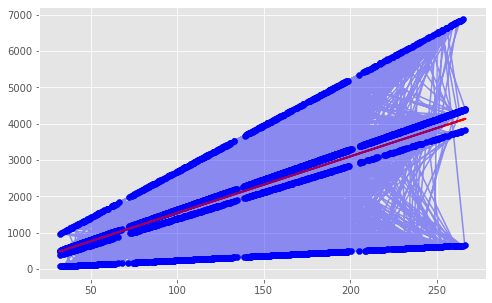

In [ ]:
plt.plot(df_model_test["Item_MRP"], y_predict_test, c = "red", linewidth = 2)
plt.plot(df_model_int_test["Item_MRP"], y_predict_test_int, c = "blue", alpha=0.4)
plt.scatter(df_model_int_test["Item_MRP"], y_predict_test_int, c = "blue")
plt.rcParams["figure.figsize"] = [7, 5]

- Faltan los datos de la columna "Item_Outlet_Sales" del dataset de test para poder calcular la performance del modelo de regresión múltiple en dicho dataset.

In [ ]:
df_model_int_test["Y_pred_test_int"] = pd.DataFrame(y_predict_test_int)
df_model_int_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Y_pred_test_int
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1,1762.533
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1,1421.523
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store,590.706
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1,2545.599
4,FDY38,NaN,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3,6087.744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2894b4cdd0>]],
      dtype=object)

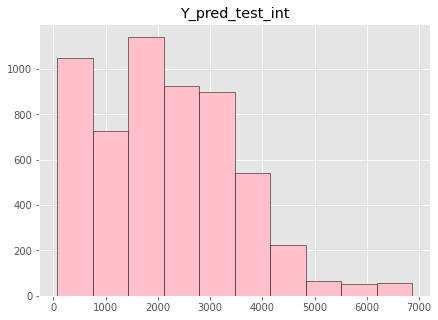

In [ ]:
df_model_int_test.hist('Y_pred_test_int', color= "pink" , edgecolor="k")

In [ ]:
df_model_int_test['Y_pred_test_int'].describe()

count   5681.000
mean    2182.255
std     1332.508
min       72.271
25%     1075.073
50%     2065.362
75%     3048.466
max     6869.188
Name: Y_pred_test_int, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()

count    8523.000
mean     2181.289
std      1706.500
min        33.290
25%       834.247
50%      1794.331
75%      3101.296
max     13086.965
Name: Item_Outlet_Sales, dtype: float64

#### Observación: 
- El promedio de ventas del dataset de Train es igual que el promedio de ventas predicho según los datos del dataset de Test y la dispersión de los datos es mucho menor para este último. Además NO predice valores negativos para las ventas!

# 4 - Feature Selection Modelo Full (Extra)

In [ ]:
df_fs = df.copy()
df_fs.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [ ]:
# primero, la variable a precidir la paso a nombrar y
df_fs.rename(columns={'Item_Outlet_Sales': 'y', 
                           }, inplace=True)

In [ ]:
df_fs.columns.values.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'y']

In [ ]:
var_exogenas = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type',
                'Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
                'Outlet_Size','Outlet_Location_Type','Outlet_Type',]

Variables categoricas

In [ ]:
categories = var_exogenas
categories.remove('Item_Weight')
categories.remove("Item_Visibility")
categories.remove("Item_MRP")
categories.remove("Outlet_Establishment_Year")

In [ ]:
categories

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
for category in categories:
  cat_list = "cat" + "_" + category
  cat_dummies = pd.get_dummies(df_fs[category], prefix = cat_list, drop_first=True, dummy_na=True)
  data_new = df_fs.join(cat_dummies)
  df_fs = data_new

In [ ]:
df_fsel = df_fs.drop(columns= categories)

In [ ]:
df_fsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Item_Identifier                      8523 non-null   object 
 1   Item_Weight                          7060 non-null   float64
 2   Item_Visibility                      8523 non-null   float64
 3   Item_MRP                             8523 non-null   float64
 4   Outlet_Establishment_Year            8523 non-null   int64  
 5   y                                    8523 non-null   float64
 6   cat_Item_Fat_Content_Regular         8523 non-null   uint8  
 7   cat_Item_Fat_Content_nan             8523 non-null   uint8  
 8   cat_Item_Type_Breads                 8523 non-null   uint8  
 9   cat_Item_Type_Breakfast              8523 non-null   uint8  
 10  cat_Item_Type_Canned                 8523 non-null   uint8  
 11  cat_Item_Type_Dairy           

In [ ]:
X_fs = df_fsel.drop(columns = ["y", 'Item_Identifier', 'Item_Weight'])
Y = df_fsel["y"]

In [ ]:
X_fs.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,cat_Item_Fat_Content_Regular,cat_Item_Fat_Content_nan,cat_Item_Type_Breads,cat_Item_Type_Breakfast,cat_Item_Type_Canned,cat_Item_Type_Dairy,cat_Item_Type_Frozen Foods,...,cat_Outlet_Size_Medium,cat_Outlet_Size_Small,cat_Outlet_Size_nan,cat_Outlet_Location_Type_Tier 2,cat_Outlet_Location_Type_Tier 3,cat_Outlet_Location_Type_nan,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,cat_Outlet_Type_nan
0,0.016,249.809,1999,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0.019,48.269,2009,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0.017,141.618,1999,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.000,182.095,1998,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0.000,53.861,1987,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
Y.head()

0   3735.138
1    443.423
2   2097.270
3    732.380
4    994.705
Name: y, dtype: float64

In [ ]:
# En statsmodels se le agrega el intercepto (en scikit se lo pasamos como un parametro a la instancia del modelo)
X_train_modelofs_stats = sm.add_constant(X_fs)
X_train_modelofs_stats.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Item_Visibility,Item_MRP,Outlet_Establishment_Year,cat_Item_Fat_Content_Regular,cat_Item_Fat_Content_nan,cat_Item_Type_Breads,cat_Item_Type_Breakfast,cat_Item_Type_Canned,cat_Item_Type_Dairy,...,cat_Outlet_Size_Medium,cat_Outlet_Size_Small,cat_Outlet_Size_nan,cat_Outlet_Location_Type_Tier 2,cat_Outlet_Location_Type_Tier 3,cat_Outlet_Location_Type_nan,cat_Outlet_Type_Supermarket Type1,cat_Outlet_Type_Supermarket Type2,cat_Outlet_Type_Supermarket Type3,cat_Outlet_Type_nan
0,1.000,0.016,249.809,1999,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1.000,0.019,48.269,2009,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1.000,0.017,141.618,1999,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.000,0.000,182.095,1998,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1.000,0.000,53.861,1987,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
modelofs_stats = sm.OLS(Y, X_train_modelofs_stats)

In [ ]:
resultados_modelofs_stats = modelofs_stats.fit()

In [ ]:
resultados_modelofs_stats.pvalues.sort_values()

cat_Outlet_Type_Supermarket Type3     0.000
cat_Outlet_Type_Supermarket Type1     0.000
Item_MRP                              0.000
cat_Outlet_Identifier_OUT027          0.000
cat_Outlet_Size_Medium                0.000
cat_Outlet_Location_Type_Tier 2       0.000
cat_Outlet_Size_nan                   0.000
cat_Outlet_Identifier_OUT019          0.000
cat_Outlet_Identifier_OUT049          0.000
Outlet_Establishment_Year             0.000
cat_Outlet_Size_Small                 0.000
cat_Outlet_Identifier_OUT046          0.000
cat_Outlet_Identifier_OUT017          0.000
cat_Outlet_Identifier_OUT013          0.000
cat_Outlet_Identifier_OUT045          0.000
cat_Outlet_Type_Supermarket Type2     0.000
cat_Outlet_Identifier_OUT018          0.000
const                                 0.000
cat_Outlet_Location_Type_Tier 3       0.003
cat_Outlet_Identifier_OUT035          0.038
cat_Item_Fat_Content_Regular          0.149
cat_Item_Type_Seafood                 0.212
Item_Visibility                 

In [ ]:
print(resultados_modelofs_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     406.6
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:23:11   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
resultados_modelofs_stats.params

const                                    1.669
Item_Visibility                       -303.931
Item_MRP                                15.565
Outlet_Establishment_Year               -0.515
cat_Item_Fat_Content_Regular            40.718
cat_Item_Fat_Content_nan                 0.000
cat_Item_Type_Breads                     5.530
cat_Item_Type_Breakfast                  7.323
cat_Item_Type_Canned                    25.526
cat_Item_Type_Dairy                    -41.176
cat_Item_Type_Frozen Foods             -28.261
cat_Item_Type_Fruits and Vegetables     29.422
cat_Item_Type_Hard Drinks                0.120
cat_Item_Type_Health and Hygiene       -10.934
cat_Item_Type_Household                -39.674
cat_Item_Type_Meat                      -0.677
cat_Item_Type_Others                   -22.184
cat_Item_Type_Seafood                  184.758
cat_Item_Type_Snack Foods              -11.686
cat_Item_Type_Soft Drinks              -27.533
cat_Item_Type_Starchy Foods             20.837
cat_Item_Type

In [ ]:
resultados_modelofs_stats.rsquared

0.56376350454416

In [ ]:
resultados_modelofs_stats.rsquared_adj

0.5623769965538943

# 5 - Conclusión Final

### Observando la performance de todos los modelos de Regresión plasmados, se elige el Modelo de Interacción como el "mejor predictor" para las ventas; con un R2 de 0.605.

$ Item Outlet Sales = \hat\beta_0 + \hat\beta_1 \cdot ItemMRP + \hat \beta_{2}  \cdot X_{Supermarket Type1} + \hat\beta_{3}  \cdot X_{Supermarket Type 2} + \hat\beta_{4}  \cdot X_{Supermarket Type 3} + \beta_{5}  \cdot (X_{Supermarket Type1} * ItemMRP) + \beta_{6}  \cdot (X_{Supermarket Type2} * ItemMRP) + \beta_{7}  \cdot (X_{Supermarket Type3} * ItemMRP) $



In [ ]:
coeficientes_int

,Coef,valor,tipo_dataset
0,𝛽0,-7.078,Train
1,𝛽1,2.473,Train
2,𝛽2,-20.935,Train
3,𝛽3,-68.630,Train
4,𝛽4,157.214,Train
5,𝛽5,14.128,Train
6,𝛽6,12.146,Train
7,𝛽7,22.877,Train
